In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import anndata as an
import sklearn.metrics
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.mixture import GaussianMixture as GMM
from scipy.stats import norm

In [2]:
#adata=sc.read(results_file_post)
#adata.uns['log1p'] = {"base":None}

Set up out properties

In [3]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')

scanpy==1.9.3 anndata==0.10.7 umap==0.5.5 numpy==1.26.4 scipy==1.13.0 pandas==2.2.2 scikit-learn==1.4.2 statsmodels==0.14.1 python-igraph==0.10.4 pynndescent==0.5.12


In [4]:
#%matplotlib inline

Set scanpy out-files

In [5]:
writeDir = "write/"

fileName = "pdacPdxMrtxGA60"

resultsFileQC = writeDir + fileName + '_QC.h5ad' 


Set figure parameters

In [6]:
sc.set_figure_params(scanpy=True, dpi=100, dpi_save=150, fontsize=10, format='png')
sc.settings.figdir = "figures/" + fileName + "/"
figName = fileName

read input file

In [7]:
inDir = 'data/'
#inputFile = f'{inDir}/.txt'
#inMetaFile = f'{inDir}/.txt'

In [8]:
adata = sc.read_10x_h5(f"{inDir}GA60_MRTX.h5", gex_only=False)
adata

reading data/GA60_MRTX.h5
 (0:00:00)


/home/jor4008/programs/miniconda3/envs/scsarc/lib/python3.9/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


AnnData object with n_obs × n_vars = 3570 × 68886
    var: 'gene_ids', 'feature_types', 'genome'

In [9]:
adata.var

,gene_ids,feature_types,genome
GRCh38_MIR1302-2HG,GRCh38_ENSG00000243485,Gene Expression,GRCh38
GRCh38_FAM138A,GRCh38_ENSG00000237613,Gene Expression,GRCh38
GRCh38_OR4F5,GRCh38_ENSG00000186092,Gene Expression,GRCh38
GRCh38_AL627309.1,GRCh38_ENSG00000238009,Gene Expression,GRCh38
GRCh38_AL627309.3,GRCh38_ENSG00000239945,Gene Expression,GRCh38
...,...,...,...
mm10___AC124606.1,mm10___ENSMUSG00000095523,Gene Expression,mm10
mm10___AC133095.2,mm10___ENSMUSG00000095475,Gene Expression,mm10
mm10___AC133095.1,mm10___ENSMUSG00000094855,Gene Expression,mm10
mm10___AC234645.1,mm10___ENSMUSG00000095019,Gene Expression,mm10


In [10]:
#numGenes = 3

#hto = adata[:,-numGenes:]
#adata = adata[:,:-numGenes]
#adata.obs = pd.DataFrame(hto.X.todense(), columns=hto.var_names, index=adata.obs.index)

In [11]:
adata.obs

""
AAACCCAAGACTTCAC-1
AAACCCATCGGCTCTT-1
AAACGCTAGCAGTACG-1
AAACGCTCAGGCGAAT-1
AAACGCTCATGAGTAA-1
...
TTTGGTTGTCGCTTAA-1
TTTGGTTTCACAATGC-1
TTTGTTGAGTCACTGT-1
TTTGTTGTCCATCGTC-1


In [12]:
adata.var_names_make_unique()
adata.obs_names_make_unique()

In [13]:
adata.obs 

""
AAACCCAAGACTTCAC-1
AAACCCATCGGCTCTT-1
AAACGCTAGCAGTACG-1
AAACGCTCAGGCGAAT-1
AAACGCTCATGAGTAA-1
...
TTTGGTTGTCGCTTAA-1
TTTGGTTTCACAATGC-1
TTTGTTGAGTCACTGT-1
TTTGTTGTCCATCGTC-1


In [14]:
adata.var

,gene_ids,feature_types,genome
GRCh38_MIR1302-2HG,GRCh38_ENSG00000243485,Gene Expression,GRCh38
GRCh38_FAM138A,GRCh38_ENSG00000237613,Gene Expression,GRCh38
GRCh38_OR4F5,GRCh38_ENSG00000186092,Gene Expression,GRCh38
GRCh38_AL627309.1,GRCh38_ENSG00000238009,Gene Expression,GRCh38
GRCh38_AL627309.3,GRCh38_ENSG00000239945,Gene Expression,GRCh38
...,...,...,...
mm10___AC124606.1,mm10___ENSMUSG00000095523,Gene Expression,mm10
mm10___AC133095.2,mm10___ENSMUSG00000095475,Gene Expression,mm10
mm10___AC133095.1,mm10___ENSMUSG00000094855,Gene Expression,mm10
mm10___AC234645.1,mm10___ENSMUSG00000095019,Gene Expression,mm10


# Start QC
investigate highest expressed genes

normalizing counts per cell
    finished (0:00:00)


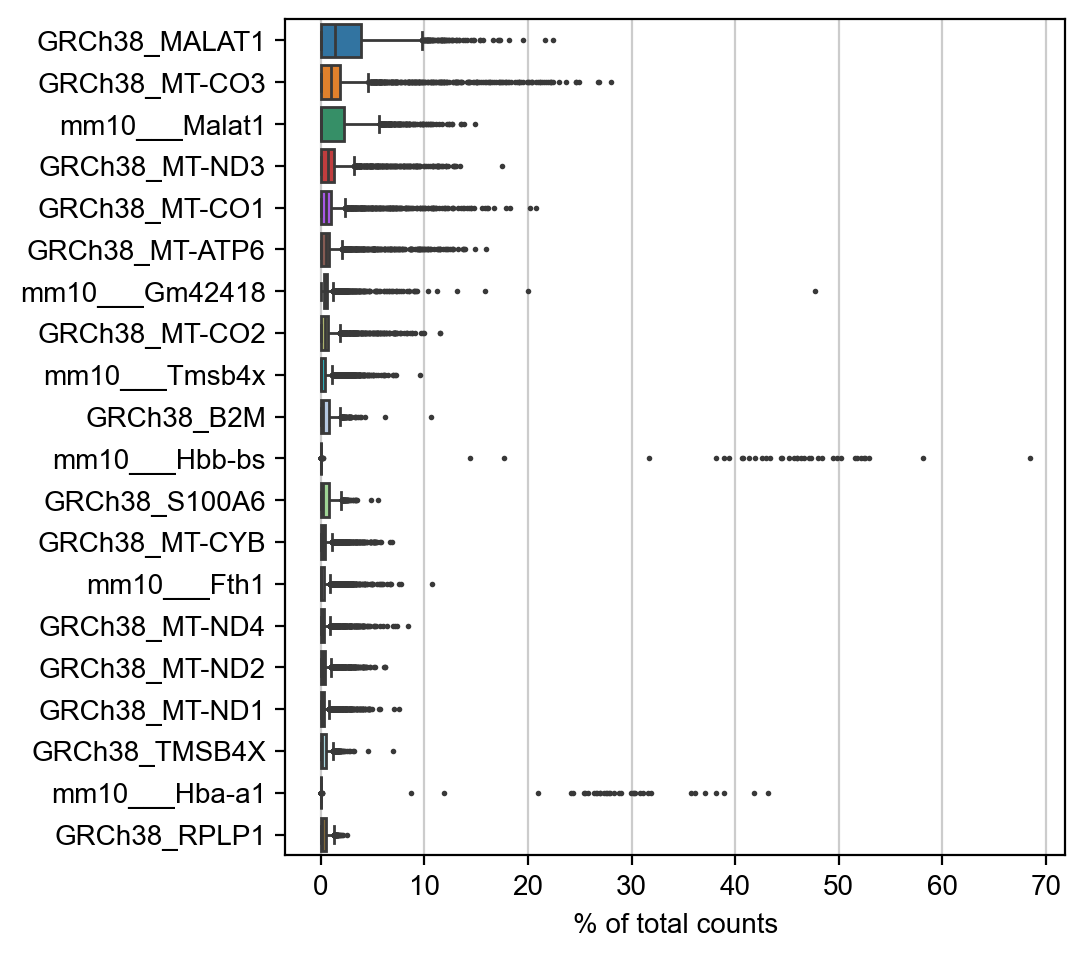

In [15]:
sc.pl.highest_expr_genes(adata, n_top=20, )

/tmp/ipykernel_4087994/1029756660.py:22: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


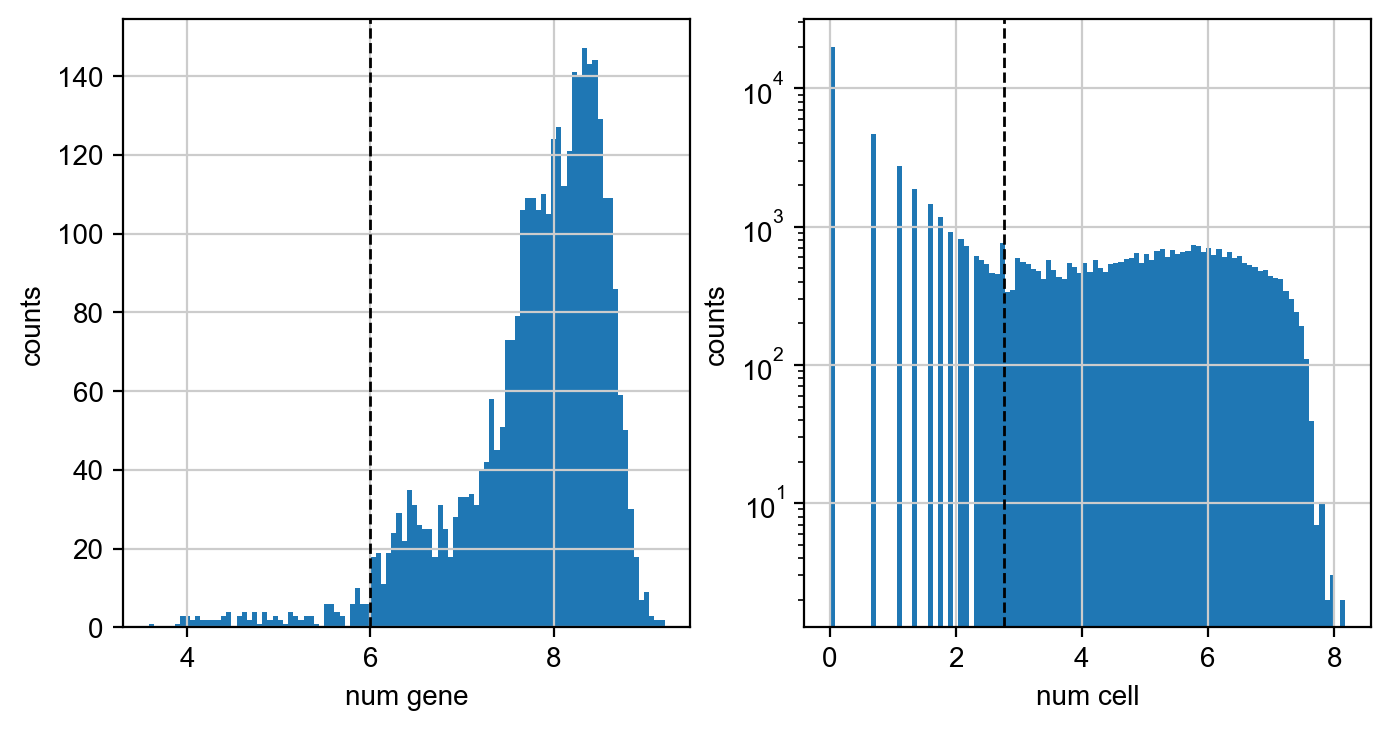

In [16]:
valX = adata.X>0
minGenes=400
minCells=15

fig, axs = plt.subplots(1, 2, figsize=(8, 4))

numCellwExp = valX.sum(axis=1)
axs[0].hist(np.log(numCellwExp), bins=100)#, log=True)
axs[0].axvline(np.log(minGenes), color='k', linestyle='dashed', linewidth=1)
axs[0].set_xlabel('num gene')
axs[0].set_ylabel('counts')

numGeneswExp = valX.sum(axis=0).T
axs[1].hist(np.log(numGeneswExp+1), bins=100, log=True)
axs[1].axvline(np.log(minCells+1), color='k', linestyle='dashed', linewidth=1)
#axs[0,1].axvline(np.log(600), color='k', linestyle='dashed', linewidth=1)
#axs[0,1].axvline(np.log(4000), color='k', linestyle='dashed', linewidth=1)
#axs[0,1].set_title('Gene means counts')
axs[1].set_xlabel('num cell')
axs[1].set_ylabel('counts')

fig.show()

In [17]:
sc.pp.filter_cells(adata, min_genes = minGenes)
sc.pp.filter_genes(adata, min_cells = minCells)

filtered out 115 cells that have less than 400 genes expressed
filtered out 37283 genes that are detected in less than 15 cells


In [18]:
adata = adata[:,np.logical_not(adata.var_names=="GRCh38_MALAT1")]

## Mouse QC

In [19]:
adata.var

,gene_ids,feature_types,genome,n_cells
GRCh38_AL627309.5,GRCh38_ENSG00000241860,Gene Expression,GRCh38,41
GRCh38_LINC01409,GRCh38_ENSG00000237491,Gene Expression,GRCh38,311
GRCh38_LINC01128,GRCh38_ENSG00000228794,Gene Expression,GRCh38,138
GRCh38_LINC00115,GRCh38_ENSG00000225880,Gene Expression,GRCh38,47
GRCh38_FAM41C,GRCh38_ENSG00000230368,Gene Expression,GRCh38,47
...,...,...,...,...
mm10___CAAA01118383.1,mm10___ENSMUSG00000063897,Gene Expression,mm10,160
mm10___Csprs,mm10___ENSMUSG00000062783,Gene Expression,mm10,211
mm10___Vamp7,mm10___ENSMUSG00000051412,Gene Expression,mm10,217
mm10___Tmlhe,mm10___ENSMUSG00000079834,Gene Expression,mm10,103


In [20]:
adata.var['mm'] = adata.var_names.str.startswith('mm10___') 
sc.pp.calculate_qc_metrics(adata, qc_vars=['mm'], log1p = False, inplace=True)

/tmp/ipykernel_4087994/1039509494.py:1: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['mm'] = adata.var_names.str.startswith('mm10___')


/home/jor4008/programs/miniconda3/envs/scsarc/lib/python3.9/site-packages/scanpy/plotting/_anndata.py:843: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  ax = sns.violinplot(


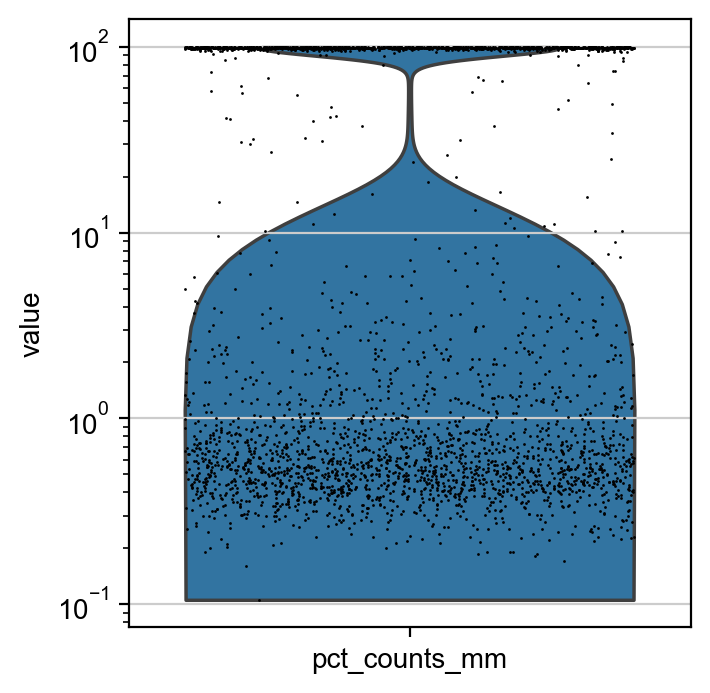

In [21]:
sc.pl.violin(adata, ['pct_counts_mm'], jitter=0.4, log=True)

In [22]:
sum(adata.obs.pct_counts_mm < 2)/len(adata.obs)

0.5374819102749638

In [23]:
adata = adata[adata.obs.pct_counts_mm < 1, :]
adata = adata[:,adata.var_names.str.startswith('GRCh38_')]
adata

View of AnnData object with n_obs × n_vars = 1626 × 18426
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mm', 'pct_counts_mm'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells', 'mm', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

In [24]:
adata.var_names = [g.split("38_")[1] for g in adata.var_names]
adata.var

,gene_ids,feature_types,genome,n_cells,mm,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts
AL627309.5,GRCh38_ENSG00000241860,Gene Expression,GRCh38,41,False,41,0.012156,98.813314,42.0
LINC01409,GRCh38_ENSG00000237491,Gene Expression,GRCh38,311,False,311,0.115774,90.998553,400.0
LINC01128,GRCh38_ENSG00000228794,Gene Expression,GRCh38,138,False,138,0.043126,96.005789,149.0
LINC00115,GRCh38_ENSG00000225880,Gene Expression,GRCh38,47,False,47,0.013893,98.639653,48.0
FAM41C,GRCh38_ENSG00000230368,Gene Expression,GRCh38,47,False,47,0.014472,98.639653,50.0
...,...,...,...,...,...,...,...,...,...
AL592183.1,GRCh38_ENSG00000273748,Gene Expression,GRCh38,127,False,127,0.040521,96.324168,140.0
AC240274.1,GRCh38_ENSG00000271254,Gene Expression,GRCh38,78,False,78,0.023444,97.742402,81.0
AC004556.3,GRCh38_ENSG00000276345,Gene Expression,GRCh38,176,False,176,0.055282,94.905933,191.0
AC007325.4,GRCh38_ENSG00000278817,Gene Expression,GRCh38,27,False,27,0.008394,99.218524,29.0


/home/jor4008/programs/miniconda3/envs/scsarc/lib/python3.9/site-packages/scanpy/plotting/_anndata.py:843: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  ax = sns.violinplot(


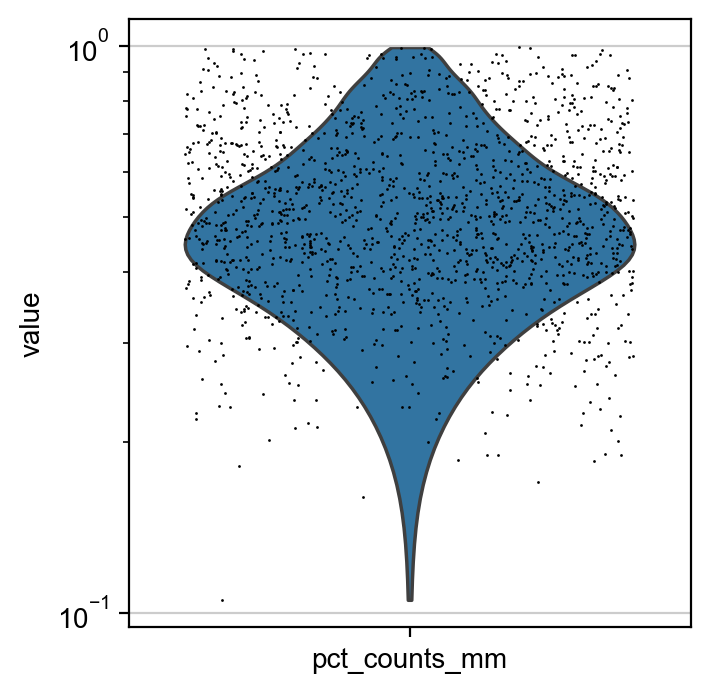

In [25]:
sc.pl.violin(adata, ['pct_counts_mm'],jitter=0.4, log = True)

In [26]:
adata.var['mt'] = adata.var_names.str.startswith('MT-')  # annotate the group of human mitochondrial genes as 'hMT'
#adata.var['mmt'] = adata.var_names.str.startswith('mm10___mt-')  # annotate the group of mouse mitochondrial genes as 'mmt'

sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)
#sc.pp.calculate_qc_metrics(adata, qc_vars=['mmt'], percent_top=None, log1p=False, inplace=True)

/home/jor4008/programs/miniconda3/envs/scsarc/lib/python3.9/site-packages/scanpy/plotting/_anndata.py:843: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  ax = sns.violinplot(


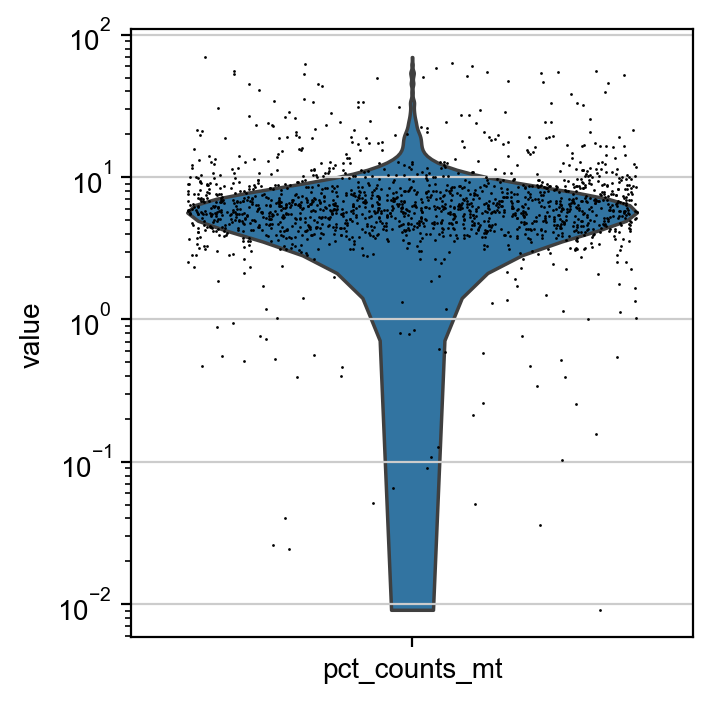

In [27]:
sc.pl.violin(adata, ["pct_counts_mt"], jitter=0.4, log=True)

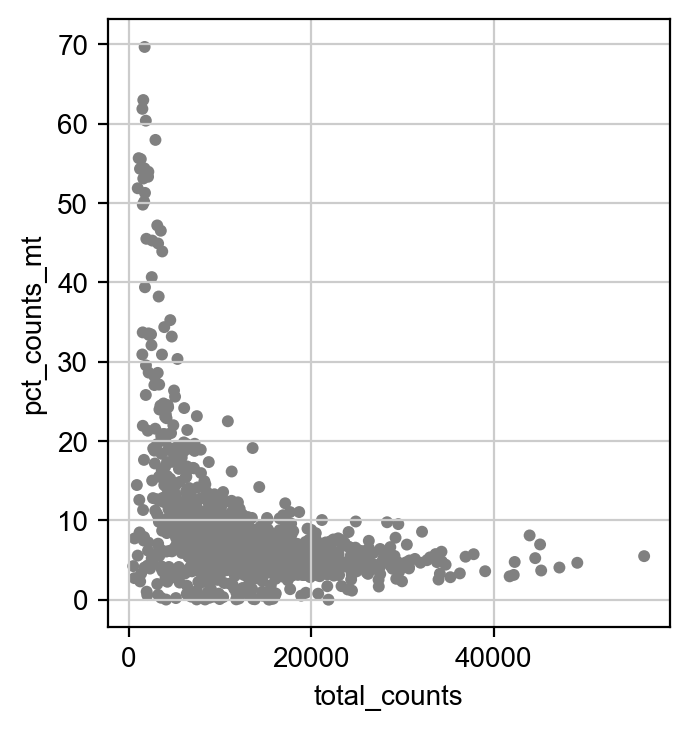

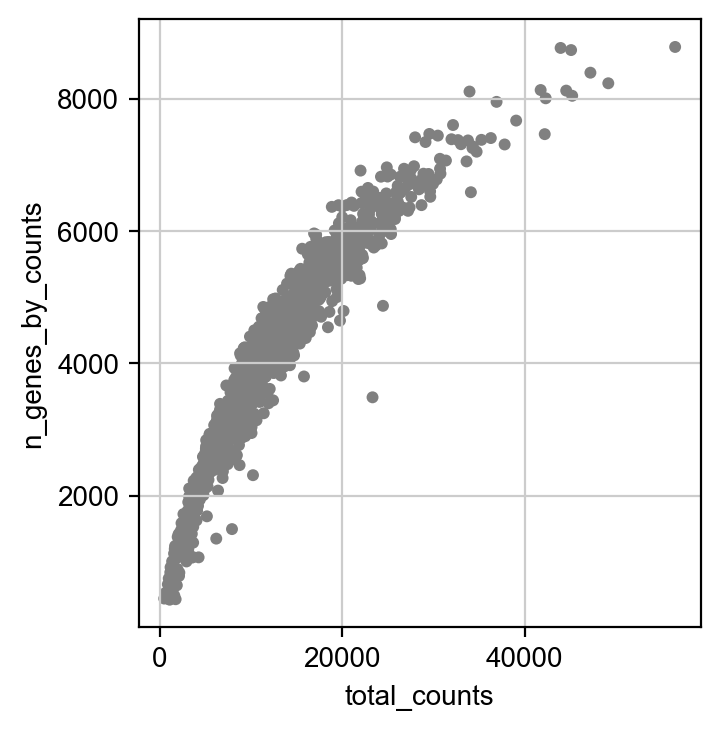

In [28]:
sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts')

remove cells that have too much mito or could be doublets

In [29]:
adata = adata[adata.obs.n_genes_by_counts < 6000, :]
adata = adata[adata.obs.total_counts < 30000, :]
adata = adata[adata.obs.pct_counts_mt < 15, :]

/home/jor4008/programs/miniconda3/envs/scsarc/lib/python3.9/site-packages/scanpy/plotting/_anndata.py:843: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  ax = sns.violinplot(


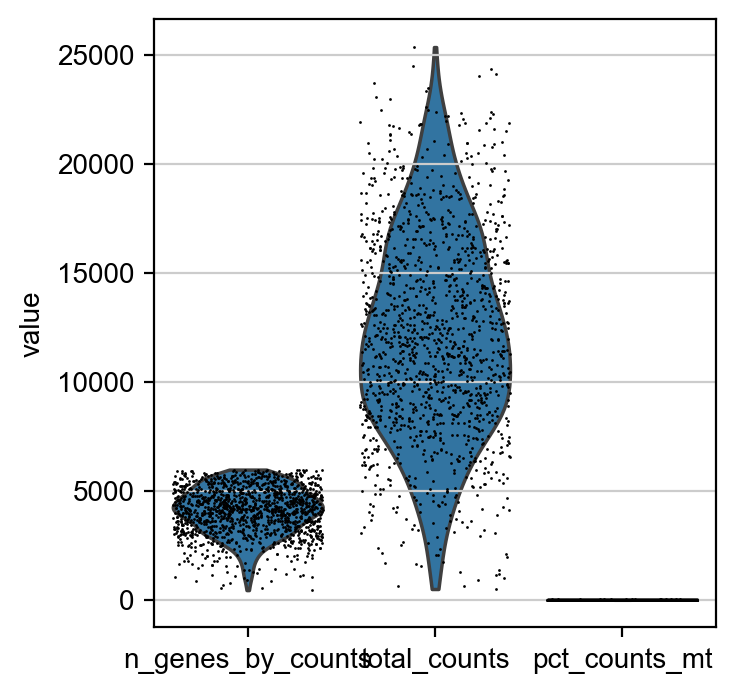

In [30]:
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'], jitter=0.4,  )

save post QC scanpy

# Perform Demultiplex Hashing

In [33]:
#hto.var_names

In [34]:
#perfrom Hashsolo anlaysis
#hashNames = 
#sc.external.pp.hashsolo(adata, hashNames)#, priors=[0.01, 0.8, 0.19], number_of_noise_barcodes=None)
#adata.obs.head()

visualize hashes

In [35]:
#output visulaization of hashing
#sc.pl.heatmap(adata, hashNames, groupby="Classification", log=True, save = f"_{figName}_hash.png")

count each hash

In [36]:
#from collections import Counter

#Counter(adata.obs["Classification"])

In [37]:
adata1 = adata

# PDX Vehcile

In [38]:
adata = sc.read_10x_h5(f"{inDir}GA60-vehicle.h5", gex_only=False)
adata

reading data/GA60-vehicle.h5
 (0:00:01)


/home/jor4008/programs/miniconda3/envs/scsarc/lib/python3.9/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


AnnData object with n_obs × n_vars = 16461 × 68886
    var: 'gene_ids', 'feature_types', 'genome'

In [39]:
adata.var

,gene_ids,feature_types,genome
GRCh38_MIR1302-2HG,GRCh38_ENSG00000243485,Gene Expression,GRCh38
GRCh38_FAM138A,GRCh38_ENSG00000237613,Gene Expression,GRCh38
GRCh38_OR4F5,GRCh38_ENSG00000186092,Gene Expression,GRCh38
GRCh38_AL627309.1,GRCh38_ENSG00000238009,Gene Expression,GRCh38
GRCh38_AL627309.3,GRCh38_ENSG00000239945,Gene Expression,GRCh38
...,...,...,...
mm10___AC124606.1,mm10___ENSMUSG00000095523,Gene Expression,mm10
mm10___AC133095.2,mm10___ENSMUSG00000095475,Gene Expression,mm10
mm10___AC133095.1,mm10___ENSMUSG00000094855,Gene Expression,mm10
mm10___AC234645.1,mm10___ENSMUSG00000095019,Gene Expression,mm10


In [40]:
adata.var[-4:]

,gene_ids,feature_types,genome
mm10___AC133095.2,mm10___ENSMUSG00000095475,Gene Expression,mm10
mm10___AC133095.1,mm10___ENSMUSG00000094855,Gene Expression,mm10
mm10___AC234645.1,mm10___ENSMUSG00000095019,Gene Expression,mm10
mm10___AC149090.1,mm10___ENSMUSG00000095041,Gene Expression,mm10


In [41]:
#numGenes = 0

#hto = adata[:,-numGenes:]
#adata = adata[:,:-numGenes]
#adata.obs = pd.DataFrame(hto.X.todense(), columns=hto.var_names, index=adata.obs.index)

In [42]:
adata.obs

""
AAACCCAAGATAACAC-1
AAACCCAAGCCATTGT-1
AAACCCAAGCCGAATG-1
AAACCCAAGGCATCGA-1
AAACCCACACACCGCA-1
...
TTTGTTGGTCCGAAGA-1
TTTGTTGTCCGTTGGG-1
TTTGTTGTCCTAGCTC-1
TTTGTTGTCGAACGGA-1


In [43]:
adata.var_names_make_unique()
adata.obs_names_make_unique()

In [44]:
adata.obs 

""
AAACCCAAGATAACAC-1
AAACCCAAGCCATTGT-1
AAACCCAAGCCGAATG-1
AAACCCAAGGCATCGA-1
AAACCCACACACCGCA-1
...
TTTGTTGGTCCGAAGA-1
TTTGTTGTCCGTTGGG-1
TTTGTTGTCCTAGCTC-1
TTTGTTGTCGAACGGA-1


In [45]:
adata.var

,gene_ids,feature_types,genome
GRCh38_MIR1302-2HG,GRCh38_ENSG00000243485,Gene Expression,GRCh38
GRCh38_FAM138A,GRCh38_ENSG00000237613,Gene Expression,GRCh38
GRCh38_OR4F5,GRCh38_ENSG00000186092,Gene Expression,GRCh38
GRCh38_AL627309.1,GRCh38_ENSG00000238009,Gene Expression,GRCh38
GRCh38_AL627309.3,GRCh38_ENSG00000239945,Gene Expression,GRCh38
...,...,...,...
mm10___AC124606.1,mm10___ENSMUSG00000095523,Gene Expression,mm10
mm10___AC133095.2,mm10___ENSMUSG00000095475,Gene Expression,mm10
mm10___AC133095.1,mm10___ENSMUSG00000094855,Gene Expression,mm10
mm10___AC234645.1,mm10___ENSMUSG00000095019,Gene Expression,mm10


# Start QC
investigate highest expressed genes

normalizing counts per cell
    finished (0:00:00)


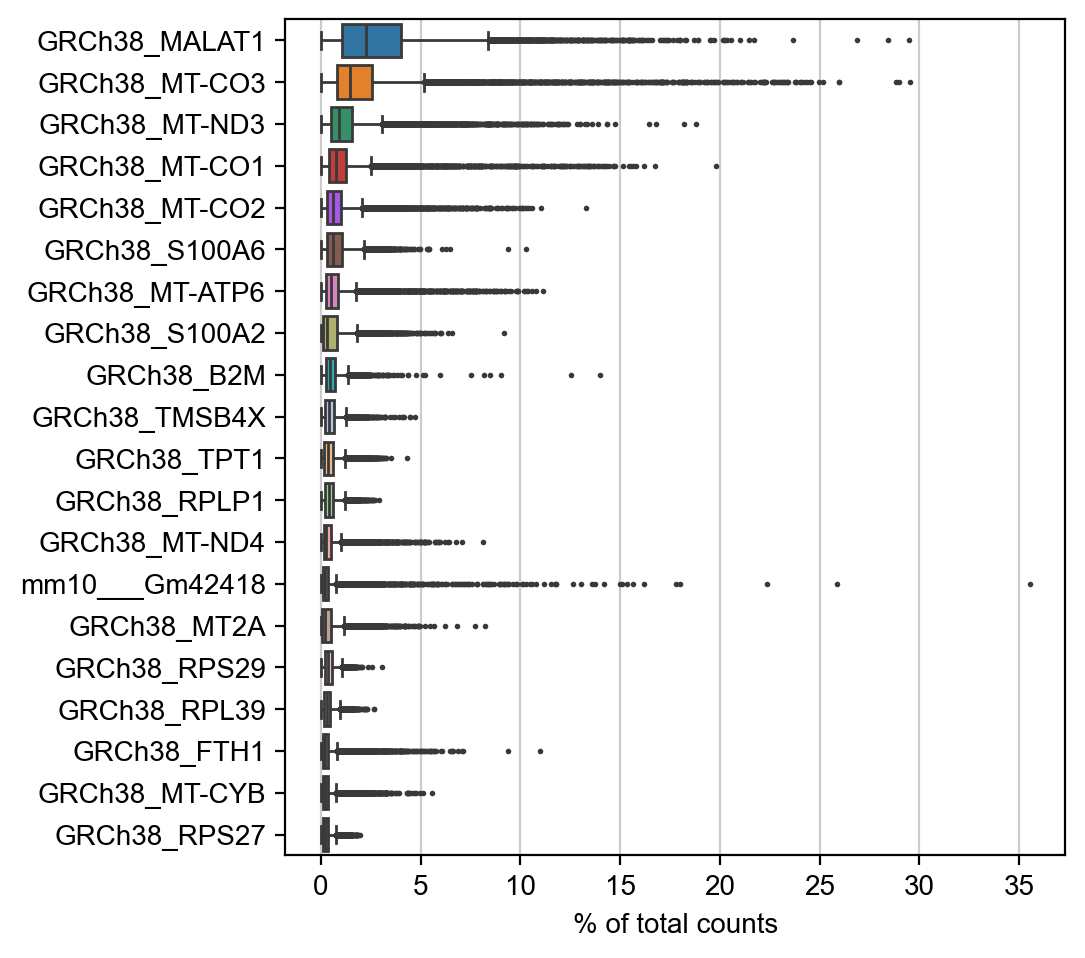

In [46]:
sc.pl.highest_expr_genes(adata, n_top=20, )

/tmp/ipykernel_4087994/3542297969.py:22: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


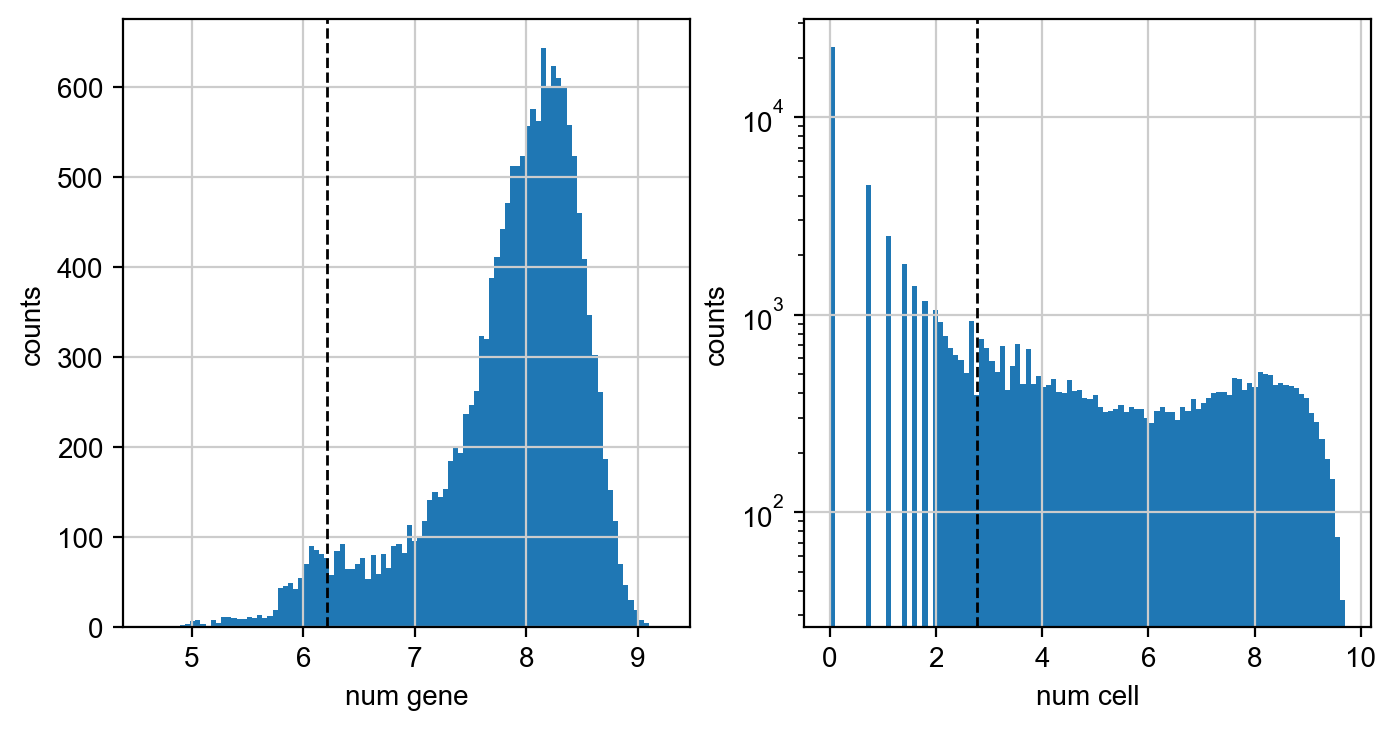

In [47]:
valX = adata.X>0
minGenes=500
minCells=15

fig, axs = plt.subplots(1, 2, figsize=(8, 4))

numCellwExp = valX.sum(axis=1)
axs[0].hist(np.log(numCellwExp), bins=100)#, log=True)
axs[0].axvline(np.log(minGenes), color='k', linestyle='dashed', linewidth=1)
axs[0].set_xlabel('num gene')
axs[0].set_ylabel('counts')

numGeneswExp = valX.sum(axis=0).T
axs[1].hist(np.log(numGeneswExp+1), bins=100, log=True)
axs[1].axvline(np.log(minCells+1), color='k', linestyle='dashed', linewidth=1)
#axs[0,1].axvline(np.log(600), color='k', linestyle='dashed', linewidth=1)
#axs[0,1].axvline(np.log(4000), color='k', linestyle='dashed', linewidth=1)
#axs[0,1].set_title('Gene means counts')
axs[1].set_xlabel('num cell')
axs[1].set_ylabel('counts')

fig.show()

In [48]:
sc.pp.filter_cells(adata, min_genes = minGenes)
sc.pp.filter_genes(adata, min_cells = minCells)

filtered out 774 cells that have less than 500 genes expressed
filtered out 40702 genes that are detected in less than 15 cells


In [49]:
adata = adata[:,np.logical_not(adata.var_names=="GRCh38_MALAT1")]

In [50]:
adata

View of AnnData object with n_obs × n_vars = 15687 × 28183
    obs: 'n_genes'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells'

## Mouse QC

In [51]:
adata.var

,gene_ids,feature_types,genome,n_cells
GRCh38_AL627309.1,GRCh38_ENSG00000238009,Gene Expression,GRCh38,30
GRCh38_AL627309.5,GRCh38_ENSG00000241860,Gene Expression,GRCh38,299
GRCh38_AL627309.4,GRCh38_ENSG00000241599,Gene Expression,GRCh38,19
GRCh38_LINC01409,GRCh38_ENSG00000237491,Gene Expression,GRCh38,2196
GRCh38_FAM87B,GRCh38_ENSG00000177757,Gene Expression,GRCh38,18
...,...,...,...,...
mm10___mt-Nd6,mm10___ENSMUSG00000064368,Gene Expression,mm10,18
mm10___mt-Cytb,mm10___ENSMUSG00000064370,Gene Expression,mm10,107
mm10___CAAA01118383.1,mm10___ENSMUSG00000063897,Gene Expression,mm10,47
mm10___Csprs,mm10___ENSMUSG00000062783,Gene Expression,mm10,24


In [52]:
adata.var['mm'] = adata.var_names.str.startswith('mm10___') 
sc.pp.calculate_qc_metrics(adata, qc_vars=['mm'], log1p = False, inplace=True)

/tmp/ipykernel_4087994/1039509494.py:1: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['mm'] = adata.var_names.str.startswith('mm10___')


/home/jor4008/programs/miniconda3/envs/scsarc/lib/python3.9/site-packages/scanpy/plotting/_anndata.py:843: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  ax = sns.violinplot(


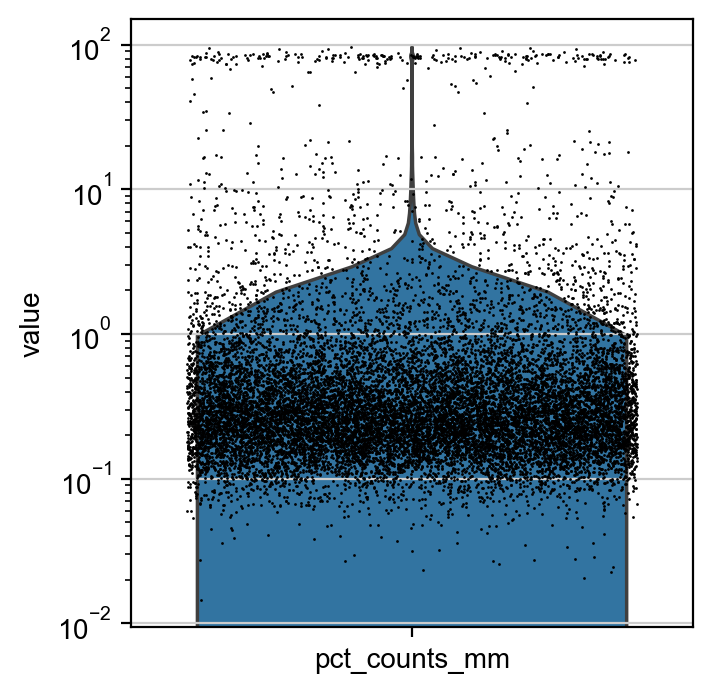

In [53]:
sc.pl.violin(adata, ['pct_counts_mm'], jitter=0.4, log=True)

In [54]:
sum(adata.obs.pct_counts_mm < 1)/len(adata.obs)

0.8816854720469178

In [55]:
adata = adata[adata.obs.pct_counts_mm < 1, :]
adata = adata[:,adata.var_names.str.startswith('GRCh38_')]
adata

View of AnnData object with n_obs × n_vars = 13831 × 23928
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mm', 'pct_counts_mm'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells', 'mm', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

In [56]:
adata.var_names = [g.split("38_")[1] for g in adata.var_names]
adata.var

,gene_ids,feature_types,genome,n_cells,mm,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts
AL627309.1,GRCh38_ENSG00000238009,Gene Expression,GRCh38,30,False,30,0.001976,99.808759,31.0
AL627309.5,GRCh38_ENSG00000241860,Gene Expression,GRCh38,299,False,299,0.019443,98.093963,305.0
AL627309.4,GRCh38_ENSG00000241599,Gene Expression,GRCh38,19,False,19,0.001211,99.878881,19.0
LINC01409,GRCh38_ENSG00000237491,Gene Expression,GRCh38,2196,False,2196,0.168930,86.001147,2650.0
FAM87B,GRCh38_ENSG00000177757,Gene Expression,GRCh38,18,False,18,0.001147,99.885255,18.0
...,...,...,...,...,...,...,...,...,...
AL592183.1,GRCh38_ENSG00000273748,Gene Expression,GRCh38,660,False,660,0.045069,95.792695,707.0
AC240274.1,GRCh38_ENSG00000271254,Gene Expression,GRCh38,359,False,359,0.023586,97.711481,370.0
AC004556.3,GRCh38_ENSG00000276345,Gene Expression,GRCh38,1378,False,1378,0.096386,91.215656,1512.0
AC007325.4,GRCh38_ENSG00000278817,Gene Expression,GRCh38,23,False,23,0.001466,99.853382,23.0


/home/jor4008/programs/miniconda3/envs/scsarc/lib/python3.9/site-packages/scanpy/plotting/_anndata.py:843: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  ax = sns.violinplot(


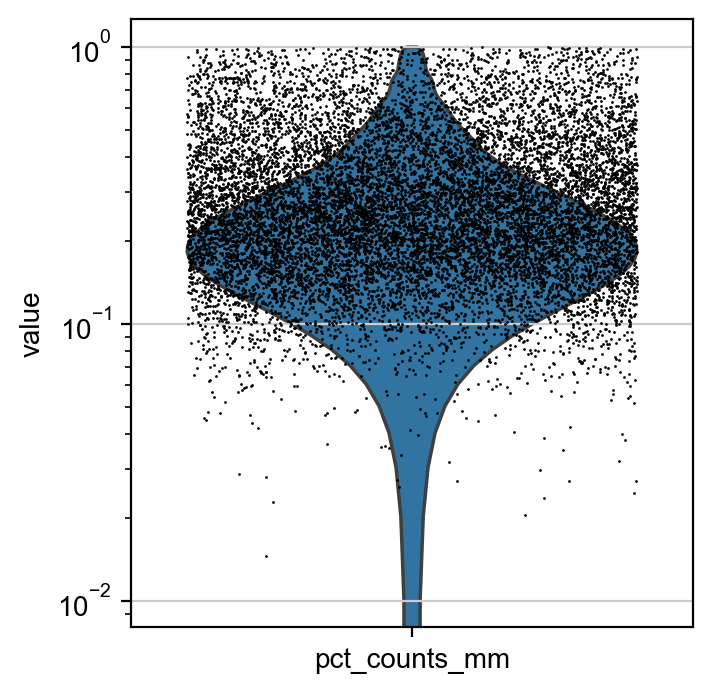

In [57]:
sc.pl.violin(adata, ['pct_counts_mm'],jitter=0.4, log = True)

In [58]:
adata.var['mt'] = adata.var_names.str.startswith('MT-')  # annotate the group of human mitochondrial genes as 'hMT'
#adata.var['mmt'] = adata.var_names.str.startswith('mm10___mt-')  # annotate the group of mouse mitochondrial genes as 'mmt'

sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)
#sc.pp.calculate_qc_metrics(adata, qc_vars=['mmt'], percent_top=None, log1p=False, inplace=True)

/home/jor4008/programs/miniconda3/envs/scsarc/lib/python3.9/site-packages/scanpy/plotting/_anndata.py:843: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  ax = sns.violinplot(


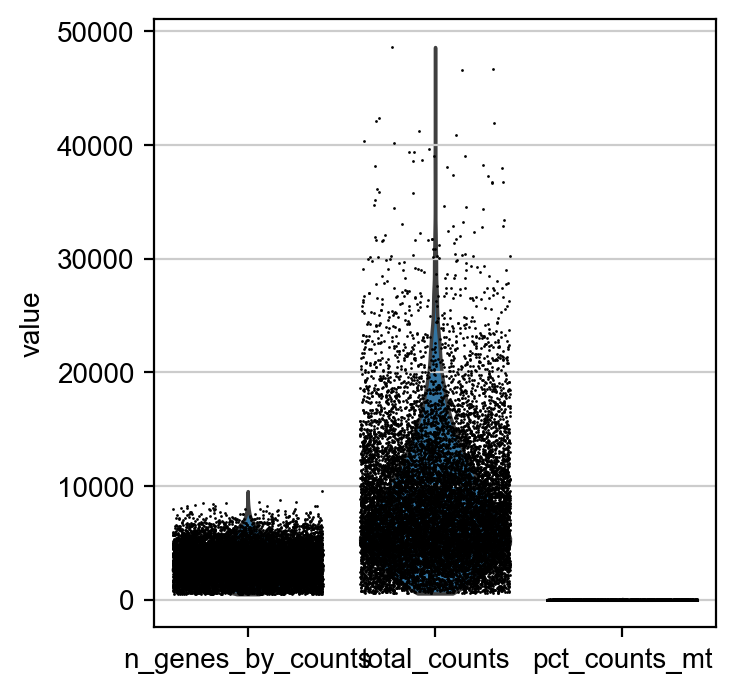

In [59]:
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'], jitter=0.4)

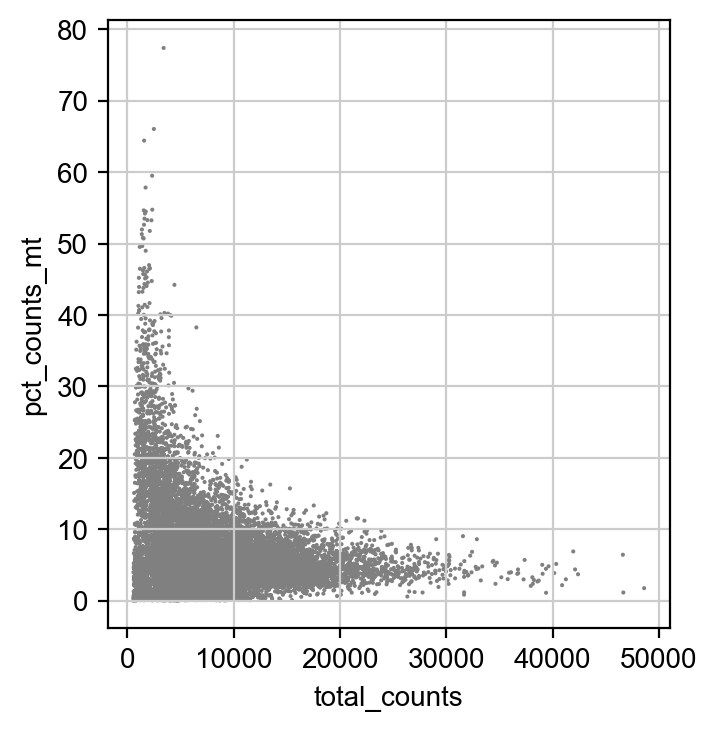

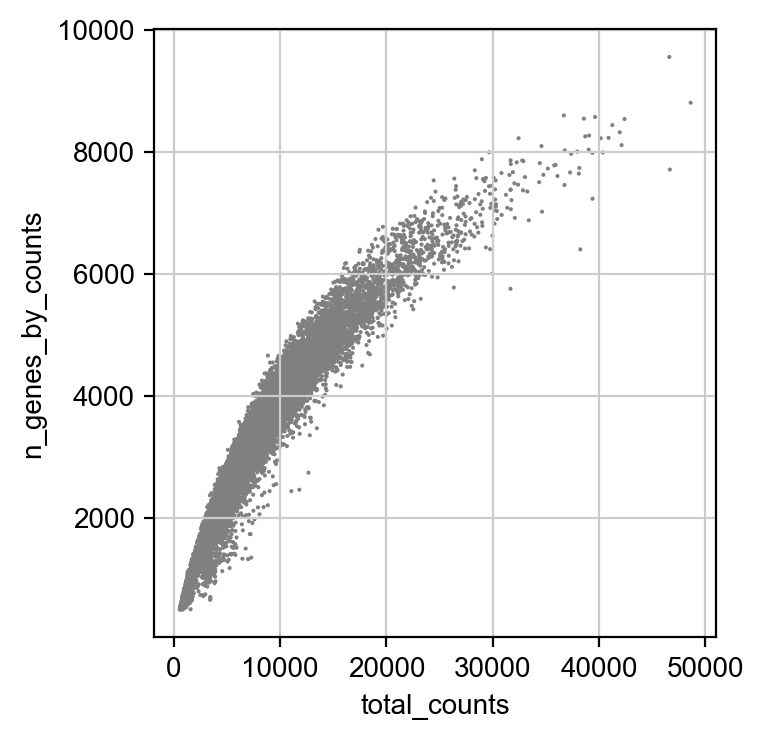

In [60]:
sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts')

remove cells that have too much mito or could be doublets

In [61]:
adata = adata[adata.obs.n_genes_by_counts < 7000, :]
adata = adata[adata.obs.total_counts < 35000, :]
adata = adata[adata.obs.pct_counts_mt < 20, :]

/home/jor4008/programs/miniconda3/envs/scsarc/lib/python3.9/site-packages/scanpy/plotting/_anndata.py:843: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  ax = sns.violinplot(


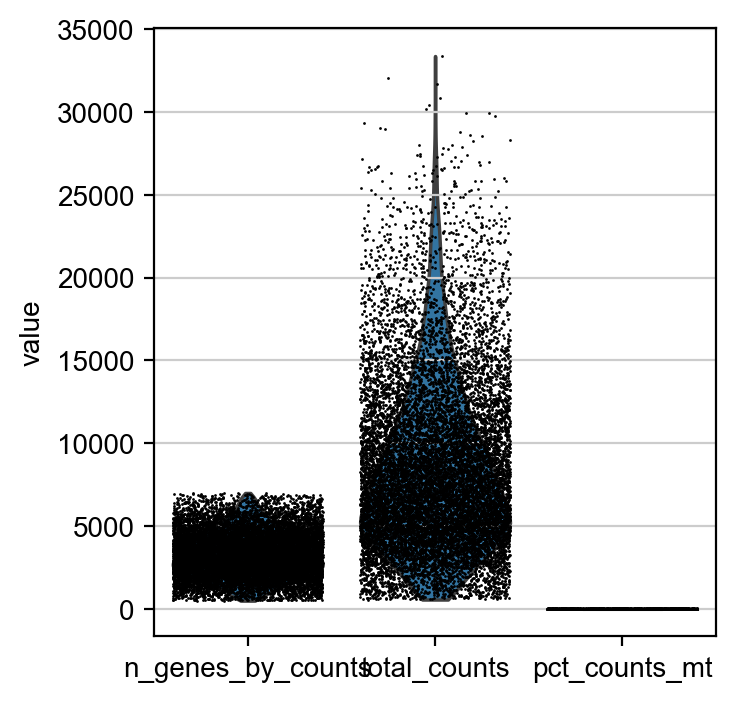

In [62]:
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'], jitter=0.4,  )

# Perform Demultiplex Hashing

In [63]:
#hto.var_names

In [64]:
#perfrom Hashsolo anlaysis
#hashNames = ['Vehicle1_B0254', 'Vehicle2_B0255', 'Vehicle3_B0256']
#sc.external.pp.hashsolo(adata, hashNames)#, priors=[0.01, 0.8, 0.19], number_of_noise_barcodes=None)
#adata.obs.head()

visualize hashes

In [65]:
#output visulaization of hashing
#sc.pl.heatmap(adata, hashNames, groupby="Classification", log=True, save = f"_{figName}_hash.png")

count each hash

In [66]:
#from collections import Counter

#Counter(adata.obs["Classification"])

In [67]:
#singlets = [x in hto.var_names for x in adata.obs["Classification"] ]
#adata = adata[singlets,]

In [68]:
adata1

View of AnnData object with n_obs × n_vars = 1366 × 18426
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mm', 'pct_counts_mm', 'total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells', 'mm', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'mt'

In [69]:
sc.pp.normalize_total(adata1,target_sum=1e4)

normalizing counts per cell
    finished (0:00:00)


/home/jor4008/programs/miniconda3/envs/scsarc/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [70]:
sc.pp.log1p(adata1)

In [71]:
adata

View of AnnData object with n_obs × n_vars = 13142 × 23928
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mm', 'pct_counts_mm', 'total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells', 'mm', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'mt'

In [72]:
sc.pp.normalize_total(adata,target_sum=1e4)

normalizing counts per cell
    finished (0:00:00)


In [73]:
sc.pp.log1p(adata)

In [74]:
adata2 = adata

In [75]:
adata = an.concat([adata1,adata2], label="treatment", keys=["mrtx","veh"], join="outer",index_unique="-")
adata.var_names_make_unique()
adata.obs_names_make_unique()
adata

AnnData object with n_obs × n_vars = 14508 × 23942
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mm', 'pct_counts_mm', 'total_counts_mt', 'pct_counts_mt', 'treatment'

In [76]:
resultsFileQC

'write/pdacPdxMrtxGA60_QC.h5ad'

In [92]:
adata.write(resultsFileQC)

In [87]:
"PTPRC" in adata2.var_names

False